One-hot encoding
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('bike-small.csv')

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


In [2]:
data_df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

In [3]:
# Create X/y data
X = data_df[['temp']].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.29525001840042764

In [4]:
# Create X/y data
X = data_df[['temp', 'weekday']].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.2988588081409286

In [5]:
pd.get_dummies(data_df, columns=['weekday']).head()

,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,0,1
1,0.363,131,1,0,0,0,0,0,0
2,0.196,120,0,1,0,0,0,0,0
3,0.200,108,0,0,1,0,0,0,0
4,0.227,82,0,0,0,1,0,0,0


In [6]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'])

# Create X/y data
X = encoded_df.drop(['casual'], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

In [7]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'], drop_first=True)
encoded_df.head()

,temp,casual,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,1
1,0.363,131,0,0,0,0,0,0
2,0.196,120,1,0,0,0,0,0
3,0.200,108,0,1,0,0,0,0
4,0.227,82,0,0,1,0,0,0


In [8]:
# Create X/y data
X = encoded_df.drop(['casual'], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

Text(0, 0.5, 'Casual')

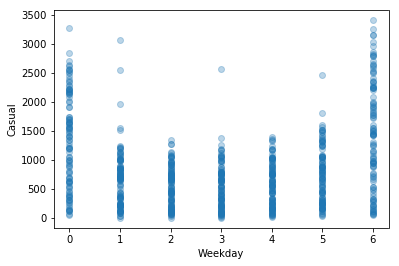

In [9]:
# Plot 'weekday' against the target casual
import matplotlib.pyplot as plt

plt.scatter(data_df['weekday'],data_df['casual'],alpha=0.3);
plt.xlabel('Weekday')
plt.ylabel('Casual')

Model 1: R2=0.004
Model 2: R2=0.274


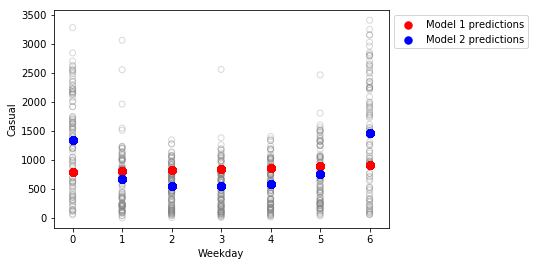

In [10]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data
data_df = pd.read_csv('bike-small.csv')

# Model 1: `weekday` is ordinal

# Create X/y data
X = data_df[['weekday']].values
y = data_df.casual.values

# Fit model
lr1 = LinearRegression()
lr1.fit(X, y)

# Model 2: `weekday` is one-hot encoded

# Apply one-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'], drop_first=True)

# Create X data
X_new = encoded_df.drop(['temp','casual'],axis=1)  # Remove feature 'temp' and the target

# Fit model
lr2 = LinearRegression()
lr2.fit(X_new, y)

# Print R2
print('Model 1: R2={}'.format(np.round(lr1.score(X,y),3)))   # Prints: Model 1: R2=0.004
print('Model 2: R2={}'.format(np.round(lr2.score(X_new,y),3)))  # Prints: Model 2: R2=0.274

# Plot ordinal `weekday` against target
plt.scatter(data_df['weekday'],data_df['casual'], color="none", edgecolor='grey', alpha=0.3, label=None);

# Model 1: Plot predictions
plt.scatter(data_df['weekday'],lr1.predict(X), color="red", s=55, label='Model 1 predictions')

# Model 2: Plot predictions
plt.scatter(data_df['weekday'],lr2.predict(X_new), color="blue", s=55, label='Model 2 predictions')

plt.xlabel('Weekday')
plt.ylabel('Casual')

plt.legend(bbox_to_anchor=(1,1));